# Travel Insurance Model Tuning

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Prepare the dataset

In [2]:
# Loading the dataset
DATA_DIR = '../_data'
FILE_NAME = 'travel_insurance.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
insurance = pd.read_csv(data_path, index_col=None)

# Creating creating binary features
# insurance['HasClaim'] = (insurance['Claim'] == 'Yes').astype('int')

## Explore the data structure

In [3]:
insurance.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [5]:
insurance.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


### Check for missing values

In [6]:
insurance.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

#### Handle missing values

In [7]:
insurance.fillna(value={'Gender': 'Unknown'}, inplace=True)  # Replace missing values in 'Gender' column with 'Unknown'

#### Encode categorical variables

In [8]:
from sklearn.preprocessing import LabelEncoder

# Creating creating binary features
insurance['Claim'] = (insurance['Claim'] == 'Yes').astype('int')

label_encoder = LabelEncoder()
insurance['Gender'] = label_encoder.fit_transform(insurance['Gender'])  # Encode 'Gender' column as numerical

insurance.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,0,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,0,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,2,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,2,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,2,41


## Prepare data for modeling

### Split the datset 

In [32]:
# Perform one-hot encoding on categorical columns
categorical_cols = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']
insurance_encoded = pd.get_dummies(insurance, columns=categorical_cols)

# Split the data into features (X - input variables) and target (y)
# X = insurance.drop('Claim', axis=1)
# y = insurance['Claim']
X = insurance_encoded.drop('Claim', axis=1)
y = insurance_encoded['Claim']

from sklearn.model_selection import train_test_split
# 80-20 split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Classification Model

### Random Forest

In [45]:
# fit random forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# look at the training accuracy score
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_true=y_test, y_pred=y_pred_rf)
print('Accuracy:', accuracy_rf)

Accuracy: 0.9845255013421759


## Confusion matrix

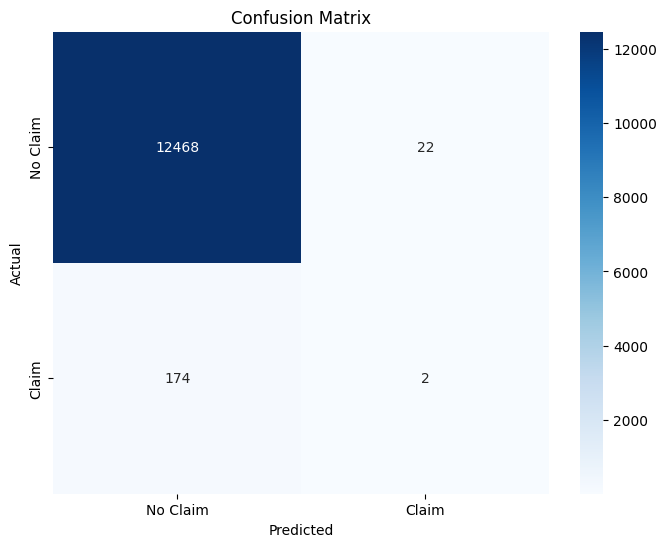

In [46]:
def print_metrics(tn, fp, fn, tp):
    accuracy = (tn + tp) / (tn + tp + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    print('Metrics')
    print(f'True negatives (TN): {tn}. The model correctly predicted "{labels[0]}"')
    print(f'True positivies (TP): {tp}. The model correctly predicted "{labels[1]}"')
    print(f'False positivies (FP): {fp}. The model incorrectly predicted "{labels[1]}" while the actual value was "{labels[0]}"')
    print(f'False negatives (FN): {fn}. The model incorrectly predicted "{labels[0]}" while the actual value was "{labels[1]}"')
    print(f'\nAccuracy: {(accuracy*100):.2f}%')
    print(f'Precision: {(precision*100):.2f}%')
    print(f'Recall: {(recall*100):.2f}%')

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
#print('Confusion Matrix:')
#print(cm)
labels = ['No Claim', 'Claim']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
tn, fp, fn, tp = cm.ravel()

print_metrics(tn, fp, fn, tp)

Metrics
True negatives (TN): 12468. The model correctly predicted "No Claim"
True positivies (TP): 2. The model correctly predicted "Claim"
False positivies (FP): 22. The model incorrectly predicted "Claim" while the actual value was "No Claim"
False negatives (FN): 174. The model incorrectly predicted "No Claim" while the actual value was "Claim"

Accuracy: 98.45%
Precision: 8.33%
Recall: 1.14%


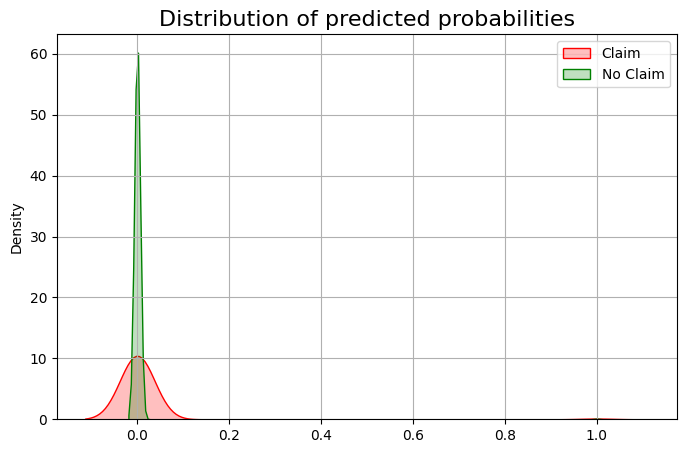

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
sns.kdeplot(y_pred_rf[y_test==1], fill=True, color='red', label="Claim", ax=ax)
sns.kdeplot(y_pred_rf[y_test==0], fill=True, color='green', label="No Claim", ax=ax)
ax.set_title("Distribution of predicted probabilities", fontsize=16)
ax.legend()
plt.grid();

In [49]:
threshold = 0.5
y_pred_prob = rf.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
labels = ['No Claim', 'Claim']
#cm_df = pd.DataFrame(cm, index=labels, columns=labels)
tn, fp, fn, tp = cm.ravel()

print_metrics(tn, fp, fn, tp)


Metrics
True negatives (TN): 12468. The model correctly predicted "No Claim"
True positivies (TP): 2. The model correctly predicted "Claim"
False positivies (FP): 22. The model incorrectly predicted "Claim" while the actual value was "No Claim"
False negatives (FN): 174. The model incorrectly predicted "No Claim" while the actual value was "Claim"

Accuracy: 98.45%
Precision: 8.33%
Recall: 1.14%


In [69]:
threshold = 0.001
y_pred_prob = rf.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print_metrics(tn, fp, fn, tp)

Metrics
True negatives (TN): 9696. The model correctly predicted "No Claim"
True positivies (TP): 105. The model correctly predicted "Claim"
False positivies (FP): 2794. The model incorrectly predicted "Claim" while the actual value was "No Claim"
False negatives (FN): 71. The model incorrectly predicted "No Claim" while the actual value was "Claim"

Accuracy: 77.38%
Precision: 3.62%
Recall: 59.66%


In [51]:
def class_cost(y_true, y_pred, cost_fn=1, cost_fp=1):
    M = confusion_matrix(y_true, y_pred)
    N = len(y_true)
    FN = M[1,0]
    FP = M[0,1]
    return (cost_fn*FN + cost_fp*FP)/N

class_cost(y_test, y_pred)

0.01397441970630033

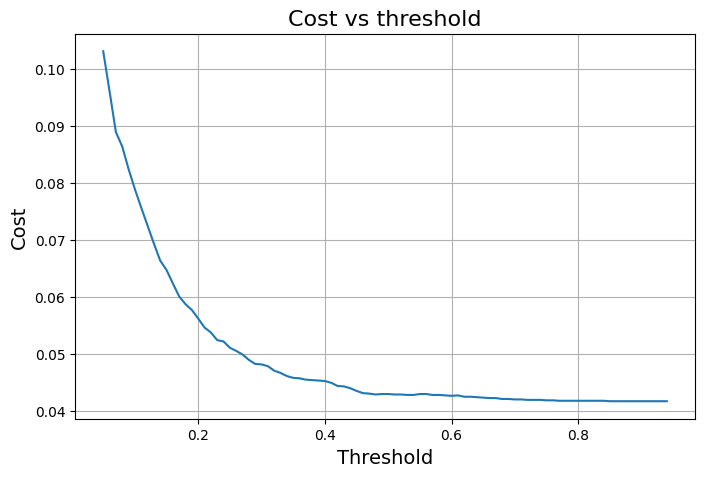

In [52]:
thresholds = np.arange(0.05, 0.95, 0.01)
costs = []
for th in thresholds:
    y_pred = (y_pred_prob > th).astype(int)
    costs.append(class_cost(y_test, y_pred, cost_fn=3, cost_fp=1))
    
costs = np.array(costs)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds, costs)
ax.set_title('Cost vs threshold', fontsize=16)
ax.set_xlabel('Threshold', fontsize=14)
ax.set_ylabel('Cost', fontsize=14)
ax.grid();

In [53]:
min_cost_th = thresholds[costs.argmin()]

print(min_cost_th)

0.8500000000000002
